In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 

In [2]:
data = pd.read_csv('Metro_Nashville_Police_Department_Calls_for_Service.csv', index_col='Call Received', parse_dates=True)

In [3]:
data.sort_index(inplace=True)

In [4]:
data

,Event Number,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,RPA,Latitude,Longitude,Mapped Location
Call Received,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:17,PD201300000001,NaN,NaN,15,NaN,P,PROGRESS,15,NaN,NaN,11TH AV N,410C,C,411,4205.0,NaN,NaN,NaN
2013-01-01 00:01:07,PD201300000004,NaN,NaN,83,NaN,P,PROGRESS,11,NaN,NaN,HOPEDALE DR,335C,S,321,8711.0,NaN,NaN,NaN
2013-01-01 00:01:27,PD201300000005,2.013000e+10,NaN,83,NaN,P,PROGRESS,6,NaN,NaN,10TH AV N,412C,C,617,4327.0,NaN,NaN,NaN
2013-01-01 00:02:08,PD201300000007,NaN,NaN,96,NaN,NaN,NaN,12,NaN,NaN,OLDHAM ST,415C,C,413,1989.0,NaN,NaN,NaN
2013-01-01 00:02:09,PD201300000006,2.013000e+10,NaN,43,NaN,P,PROGRESS,6,NaN,600.0,SYLVAN ST,212C,E,211,1043.0,36.168,-86.759,POINT (-86.759 36.168)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 23:56:25,PD202100178771,NaN,NaN,3,NaN,NaN,NaN,10,NaN,NaN,NaN,7P72,N,625N,3133.0,NaN,NaN,NaN
2021-03-17 23:57:02,PD202100178773,NaN,NaN,96,BUSINESS CHECK,NaN,NaN,12,NaN,NaN,NaN,815C,MT,811K,5711.0,NaN,NaN,NaN
2021-03-17 23:58:11,PD202100178775,NaN,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,PM,NaN,4,NaN,NaN,NaN,315C,S,315,8831.0,NaN,NaN,NaN


In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8281717 entries, 2013-01-01 00:00:17 to 2021-03-17 23:59:34
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Event Number                8281717 non-null  object 
 1   Complaint Number            576425 non-null   float64
 2   Shift                       0 non-null        float64
 3   Tencode                     8281717 non-null  int64  
 4   Tencode Description         321190 non-null   object 
 5   Tencode Suffix              4532682 non-null  object 
 6   Tencode Suffix Description  3952000 non-null  object 
 7   Disposition Code            8236379 non-null  object 
 8   Disposition Description     0 non-null        float64
 9   Block                       2458313 non-null  float64
 10  Street Name                 3559530 non-null  object 
 11  Unit Dispatched             7756775 non-null  object 
 12  Sector                 

In [6]:
data.drop(columns=['Shift','Disposition Description'], inplace=True)

### Plotting Call Data on Nashville Map

In [7]:
BBox = (data.Longitude.min(), data[~(data.Longitude.isna()) & (data.Longitude<0)].Longitude.max(), data[~(data.Latitude.isna()) & (data.Latitude>0)].Latitude.min(), data.Latitude.max())
print(BBox)

(-87.04, -86.29, 35.836999999999996, 36.402)


In [8]:
ruh_m = plt.imread('Metro_Nashville_map.png')

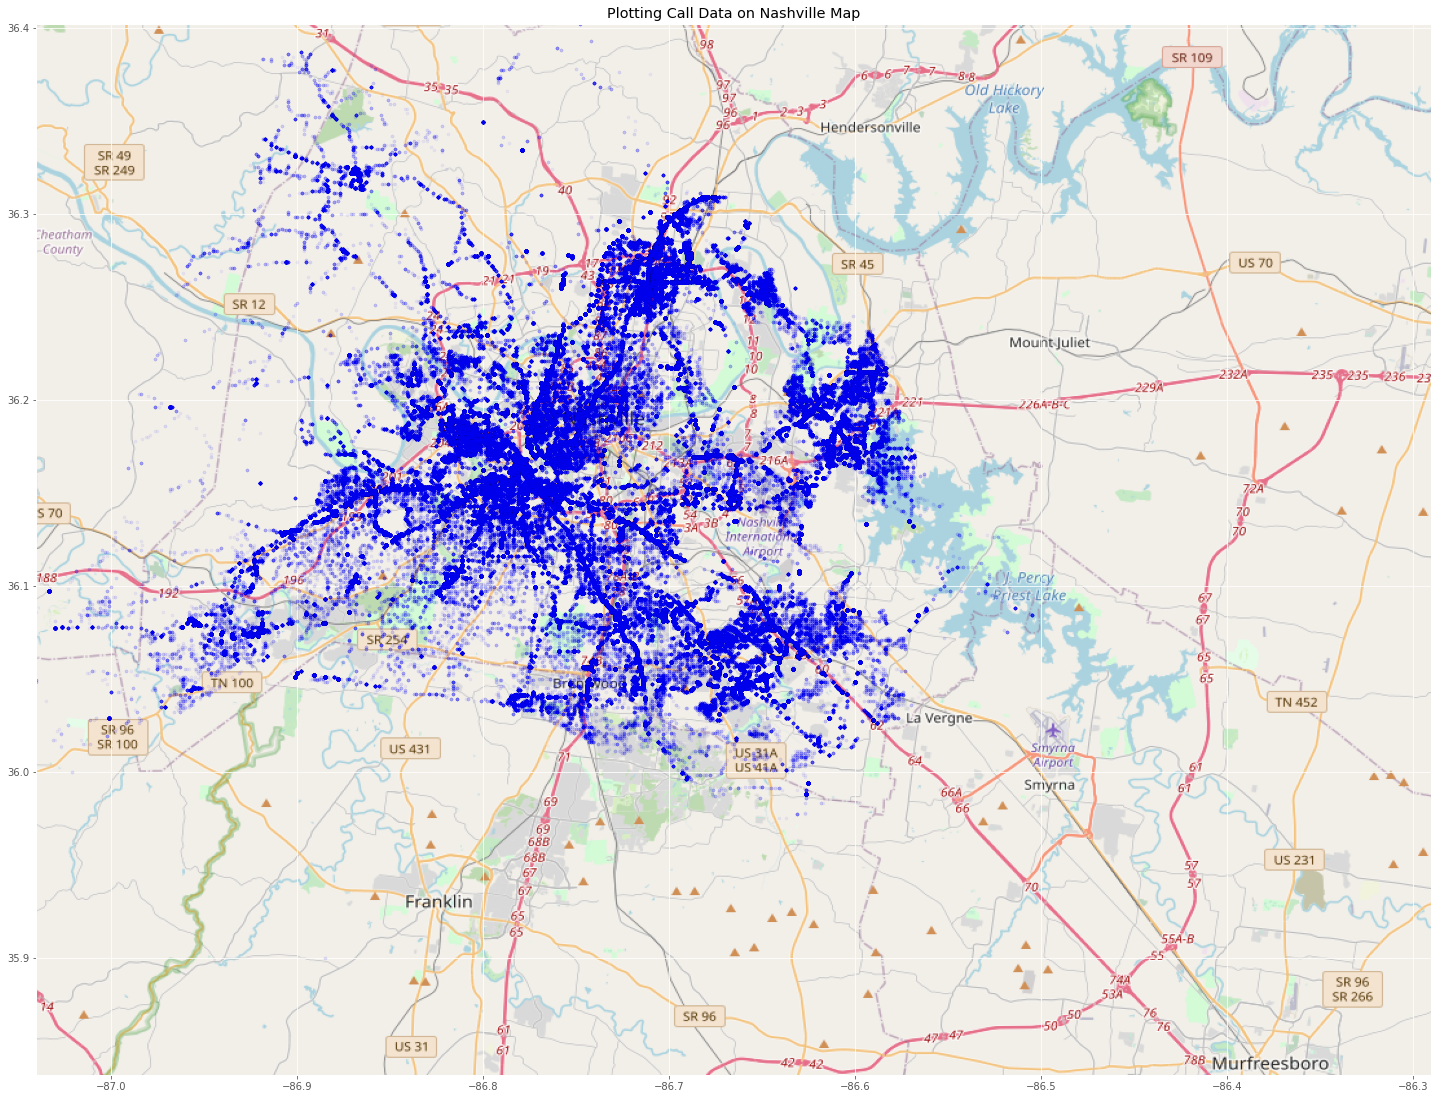

In [9]:
fig, ax = plt.subplots(figsize = (25,25))
ax.scatter(data[~(data.Longitude.isna()) & (data.Longitude<0)].Longitude, data[~(data.Latitude.isna()) & (data.Latitude>0)].Latitude, zorder=1, alpha=0.05, c='b', s=10)
ax.set_title('Plotting Call Data on Nashville Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.savefig('Calls_map.png', transparent=True)
plt.show()

### Cumulative calls over time

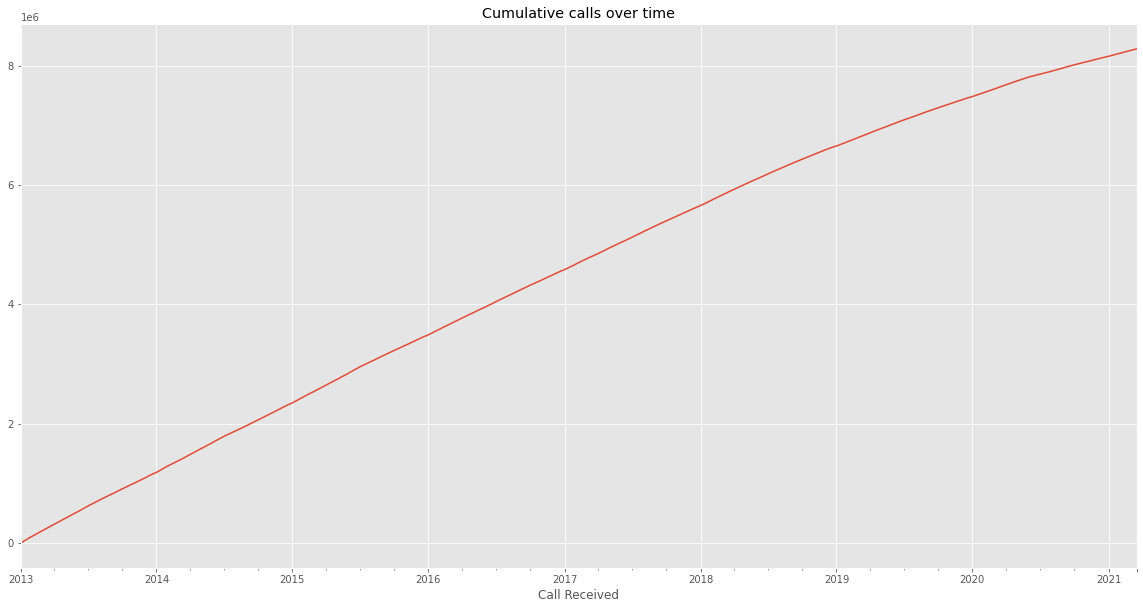

In [10]:
plt.figure(figsize=(20,10))
data.resample('D')['Event Number'].count().cumsum().plot()
plt.title('Cumulative calls over time')
plt.show()

- We can see how the number of calls has been somewhat steady in the last ~7 years. However, we can see how its slope has decreased a little towards the last few years. We should be able to see this trend better by generating a daily time series of the amount of calls:

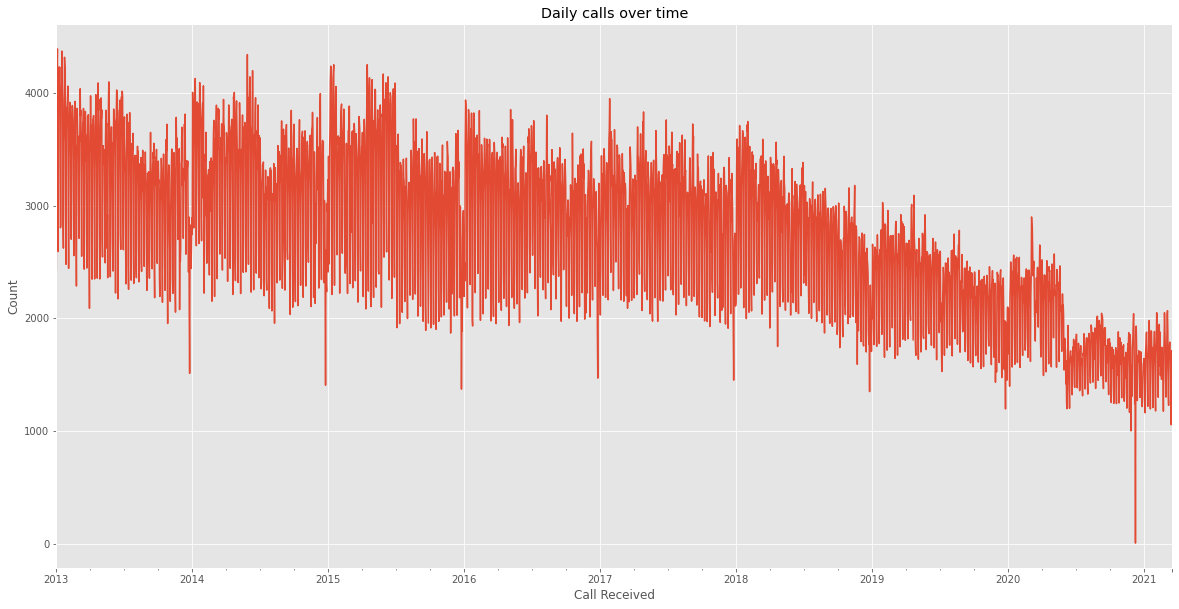

In [11]:
data.resample('D')['Event Number'].count().plot(figsize=(20,10))
plt.ylabel('Count')
plt.title('Daily calls over time')
plt.show()

In [12]:
print(data.resample('D')['Event Number'].count()[data.resample('D')['Event Number'].count() == data.resample('D')['Event Number'].count().min()],
data.resample('D')['Event Number'].count()[data.resample('D')['Event Number'].count() == data.resample('D')['Event Number'].count().max()])

Call Received
2020-12-08    4
Freq: D, Name: Event Number, dtype: int64 Call Received
2013-01-04    4395
Freq: D, Name: Event Number, dtype: int64


In [13]:
data.resample('D')['Event Number'].count()[data.resample('D')['Event Number'].count() > 4].min()

1001

In [14]:
data.resample('D')['Event Number'].count()[data.resample('D')['Event Number'].count() == 1001]

Call Received
2020-11-26    1001
Freq: D, Name: Event Number, dtype: int64

- Highest number of service calls happened on January 4th of 2013 with 4,395 calls.
- Lowest number of service calls happened on December 8th of 2020 with 4 calls. This outlier is most likely due to an error in the system, however, I could not find any news articles about this specific day to make sure this is not an error.
- Second lowest number of service calls happened on November 26th of 2020 with 1001 calls.
- We can corroborate the trend seen in the previous graph.



### Call count for each month

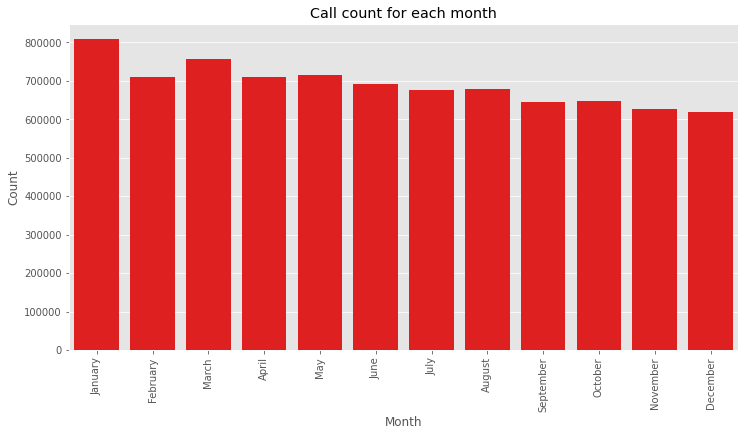

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=pd.DataFrame(data.groupby(data.index.month_name())['Event Number'].count()).reset_index(), x='Call Received', y='Event Number',
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], color='r')
plt.xticks(rotation = 90)
plt.title('Call count for each month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

- The month with the most calls overall is January. We can see what kind of Tencodes are the most common in January:

In [16]:
data[data.index.month == 1].Tencode.value_counts().sort_values(ascending=False)

93      206396
96      170319
43      136136
15       41127
45       27277
40       26167
44       25831
50       25465
87       24301
70       19617
71       17958
3        15949
88       13283
49        6796
46        6738
95        6706
57        5725
83        5228
92        3652
53        3173
65        2768
75        2639
16        2476
54        2360
63        2318
42        1651
64         997
35         709
62         462
52         457
58         422
61         404
59         393
94         330
14         318
73         247
51         185
1000       119
68         102
66          58
8000        49
77          44
5000        23
3000        13
85           9
79           8
89           8
6000         6
2000         1
7000         1
4000         1
Name: Tencode, dtype: int64

Top three correspond to:
- 93 Traffic Violation
- 96 Business Check
- 43 Want Officer for Investigation / Assistance

### Call count for each weekday

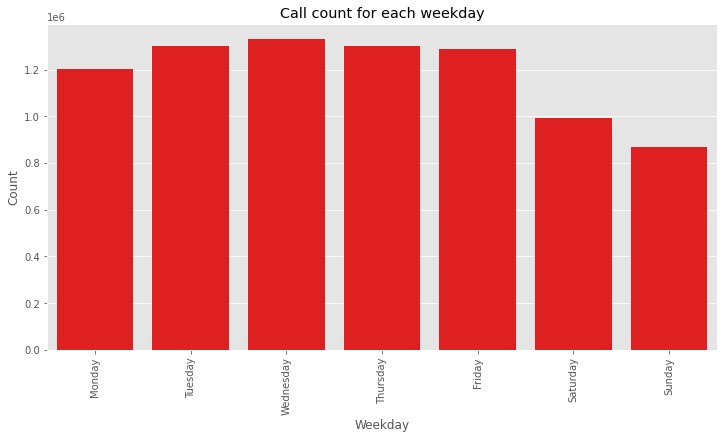

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=pd.DataFrame(data.groupby(data.index.day_name())['Event Number'].count()).reset_index(), x='Call Received', y='Event Number',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],color='r')
plt.xticks(rotation = 90)
plt.title('Call count for each weekday')
plt.ylabel('Count')
plt.xlabel('Weekday')
plt.show()

Sundays is the day with the least calls, followed by Saturday. The rest are pretty equally distributed. This might be because there are not as many people driving during Saturday and Sunday as there is during the week.

### Call count for each year

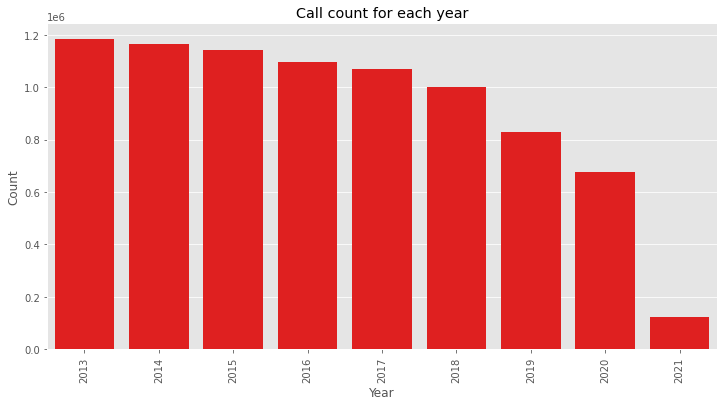

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=pd.DataFrame(data.groupby(data.index.year)['Event Number'].count()).reset_index(), x='Call Received', y='Event Number',color='r')
plt.xticks(rotation = 90)
plt.title('Call count for each year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [19]:
for i in pd.unique(data.index.year):
    print(f'Top three tencodes for year {i}:')
    print(data[data.index.year == i].Tencode.value_counts().sort_values(ascending=False)[:3])

Top three tencodes for year 2013:
93    388954
96    238915
43    163732
Name: Tencode, dtype: int64
Top three tencodes for year 2014:
93    390488
96    202521
43    167550
Name: Tencode, dtype: int64
Top three tencodes for year 2015:
93    337334
96    199898
43    176780
Name: Tencode, dtype: int64
Top three tencodes for year 2016:
93    282593
96    209066
43    176639
Name: Tencode, dtype: int64
Top three tencodes for year 2017:
93    238332
96    226909
43    175324
Name: Tencode, dtype: int64
Top three tencodes for year 2018:
96    218689
43    180947
93    179577
Name: Tencode, dtype: int64
Top three tencodes for year 2019:
43    189336
96    163109
15     66529
Name: Tencode, dtype: int64
Top three tencodes for year 2020:
43    180577
96    123693
44     43034
Name: Tencode, dtype: int64
Top three tencodes for year 2021:
43    34601
96    18671
44     8150
Name: Tencode, dtype: int64


From 2013 to 2018 we have the same ones:
- 93 Traffic Violation
- 96 Business Check
- 43 Want Officer for Investigation / Assistance

For 2019 we have:
- 96 Business Check
- 43 Want Officer for Investigation / Assistance
- 15 Community Policing Activity

And for 2020:
- 96 Business Check
- 43 Want Officer for Investigation / Assistance
- 44 Disorderly Person

So far, for 2021 we have:
- 96 Business Check
- 43 Want Officer for Investigation / Assistance
- 44 Disorderly Person

### Call count for each sector

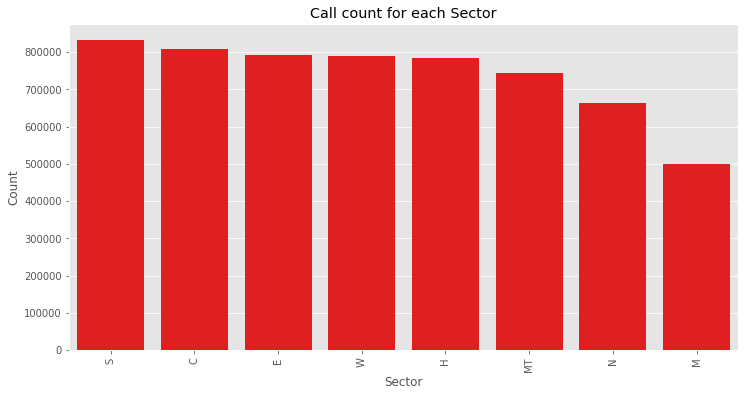

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=pd.DataFrame(data.groupby(data.Sector)['Event Number'].count().sort_values(ascending=False)[:8]).reset_index(), x='Sector', y='Event Number',color='r')
plt.xticks(rotation = 90)
plt.title('Call count for each Sector')
plt.ylabel('Count')
plt.show()

In [21]:
data.Sector.unique()

array(['C', 'S', 'E', 'N', '613', '119', 'M', 'H', '311', '715', '133',
       'W', '321', '621', '225', '315', '333', '611', '111', '323', '521',
       nan, '317', '533', '511', '223', '325', '513', '339', '123', '627',
       '421', '115', '711', '725', '623', '331', 'PCW', 'CW', '517',
       '113', '233', '423', '137', '135', 'ECC', '131', 'TE', '535',
       '523', '235', '327', '335', '313', '537', 'HERMIT', '413', '615',
       '127', '713', '337', '625', '231', 'CENTRA', '215', '117', '515',
       '525', '125', 'NORTH', '232', '211', '121', '723', '415', '531',
       'MADISO', 'South', 'SOUTH', '425', '213', '411', '721', '221',
       'MT', 'EAST', 'Centra', '336', '424', 'WEST', 'Hermit', 'Madiso',
       '524', 'North', '334', 'East', '0', '435', 'West', '514', '422',
       '527', 'SPC', '526', '532', '226', '236', 'JTF'], dtype=object)

- C: Central
- E: East
- H: Hermitage
- M: Madison
- MT: Midtown Hills
- N: North
- S: South
- W: West

`Even though the documentation only gives 8 unique Sector codes, there are 108 different codes in the dataset. For the sake of this evaluation, I will only use the ones provided in the documentation. If a more accurate representation of Sector is required, this could be achieved by applying regex to the values and replacing them with the correct value. For the numeric values, we will need to contact Nashville Police Department to understand what they mean`

### Tencodes

Tencodes to look into:
- 32 D.U.I Test Requested
- 42 Intoxicated Person
- 35 Mentally ILL Person
- 50 Theft
- 52 Shooting
- 53 Holdup / Robbery
- 54 Person with Weapon
- 57 Fight / Assault
- 66 Bomb Threat
- 68 Kidnapping
- 70 Burglary - Residence
- 75 Missing Person
- 85 Prisoner Escapee
- 1000 Bank Robbery
- 2000 Aircraft Crash
- 3000 Barricaded Suspect
- 4000 Sniper
- 5000 Personnel in Serious Danger
- 6000 Riot / Disorderly Crowd
- 7000 Train Derailment
- 8000 Explosion
- 9000 Active Aggressor

In [22]:
tencodes=[
         '''1 Receiving Poorly
            2 Receiving Well
            3 Administrative/Special Assignment
            4 Acknowledgement/O.K
            7 Out Of Service
            8 In-Service
            9 Repeat Transmission
            13 Consider Suspect(s) Very Dangerous
            14 Escort / Convoy
            15 Community Policing Activity
            16 Transport Prisoner / Suspect
            20 Your Location
            28 Check Full Registration / Stolen Only
            30 Check Warrants / Record Information
            32 D.U.I. Test Requested
            35 Mentally ILL Person
            37 Send Back-up
            40 Suspicious Person
            42 Intoxicated Person
            43 Want Officer for Investigation / Assistance
            44 Disorderly Person
            45 Vehicle Accident - Property Damage
            46 Vehicle Accident - Personal Injury
            47 Ambulance Requested
            48 Wrecker Requested
            49 Vehicle Blocking Right of Way
            50 Theft
            51 Cutting / Stabbing
            52 Shooting
            53 Holdup / Robbery
            54 Person with Weapon
            57 Fight / Assault
            58 Prowler
            59 Person Indecently Exposed
            60 Blood Run
            61 Fire
            62 Person Screaming
            63 Suicidal Person
            64 Corpse / D. O. A.
            65 Dangerous / Injured Animal
            66 Bomb Threat
            68 Kidnapping
            70 Burglary - Residence
            71 Burglary - Non-Residence
            72 Item / Vehicle is Stolen
            73 Hazardous Liquid / Gas Leak
            75 Missing Person
            77 Gang Activity
            79 Occult Activity
            83 Shots Fired
            85 Prisoner Escapee
            87 Safety Hazard
            88 Investigate 911 Hang-Up Call
            89 Drowning
            92 Fixed Post
            93 Traffic Violation
            94 Personal Relief
            95 Meal Break
            96 Business Check
            97 On the Scene
            98 Assignment Complete. Give Complaint Number
            99 Give Complaint Number, Leave Out on Call
            1000 Bank Robbery
            2000 Aircraft Crash
            3000 Barricaded Suspect
            4000 Sniper
            5000 Personnel in Serious Danger
            6000 Riot / Disorderly Crowd
            7000 Train Derailment
            8000 Explosion
            9000 Active Aggressor'''
]

In [23]:
tencodes = tencodes[0].split('\n')
for i in range(len(tencodes)):
    tencodes[i]=tencodes[i].rstrip().lstrip().split(' ',1)

tencodes = dict(tencodes)
tencodes = {int(k):v for k,v in tencodes.items()}

In [24]:
tencodeplot = dict()
for k,v in tencodes.items():
    x = data[data.Tencode ==k].Tencode.count()
    tencodeplot[v] = x
tencodeplot = {k: v for k, v in sorted(tencodeplot.items(), key=lambda item: item[1], reverse=True)}
tencodeplot

{'Traffic Violation': 1907389,
 'Business Check': 1601471,
 'Want Officer for Investigation / Assistance': 1445486,
 'Community Policing Activity': 418923,
 'Disorderly Person': 323763,
 'Vehicle Accident - Property Damage': 313303,
 'Suspicious Person': 299638,
 'Theft': 289949,
 'Safety Hazard': 278112,
 'Burglary - Residence': 223634,
 'Burglary - Non-Residence': 190771,
 'Administrative/Special Assignment': 171741,
 'Investigate 911 Hang-Up Call': 161523,
 'Vehicle Accident - Personal Injury': 84659,
 'Vehicle Blocking Right of Way': 74933,
 'Fight / Assault': 73744,
 'Meal Break': 62422,
 'Shots Fired': 53876,
 'Fixed Post': 42279,
 'Holdup / Robbery': 34171,
 'Person with Weapon': 32106,
 'Missing Person': 31326,
 'Dangerous / Injured Animal': 29427,
 'Transport Prisoner / Suspect': 27801,
 'Suicidal Person': 26350,
 'Intoxicated Person': 21840,
 'Corpse / D. O. A.': 9987,
 'Mentally ILL Person': 7372,
 'Person Indecently Exposed': 6939,
 'Shooting': 5194,
 'Person Screaming': 49

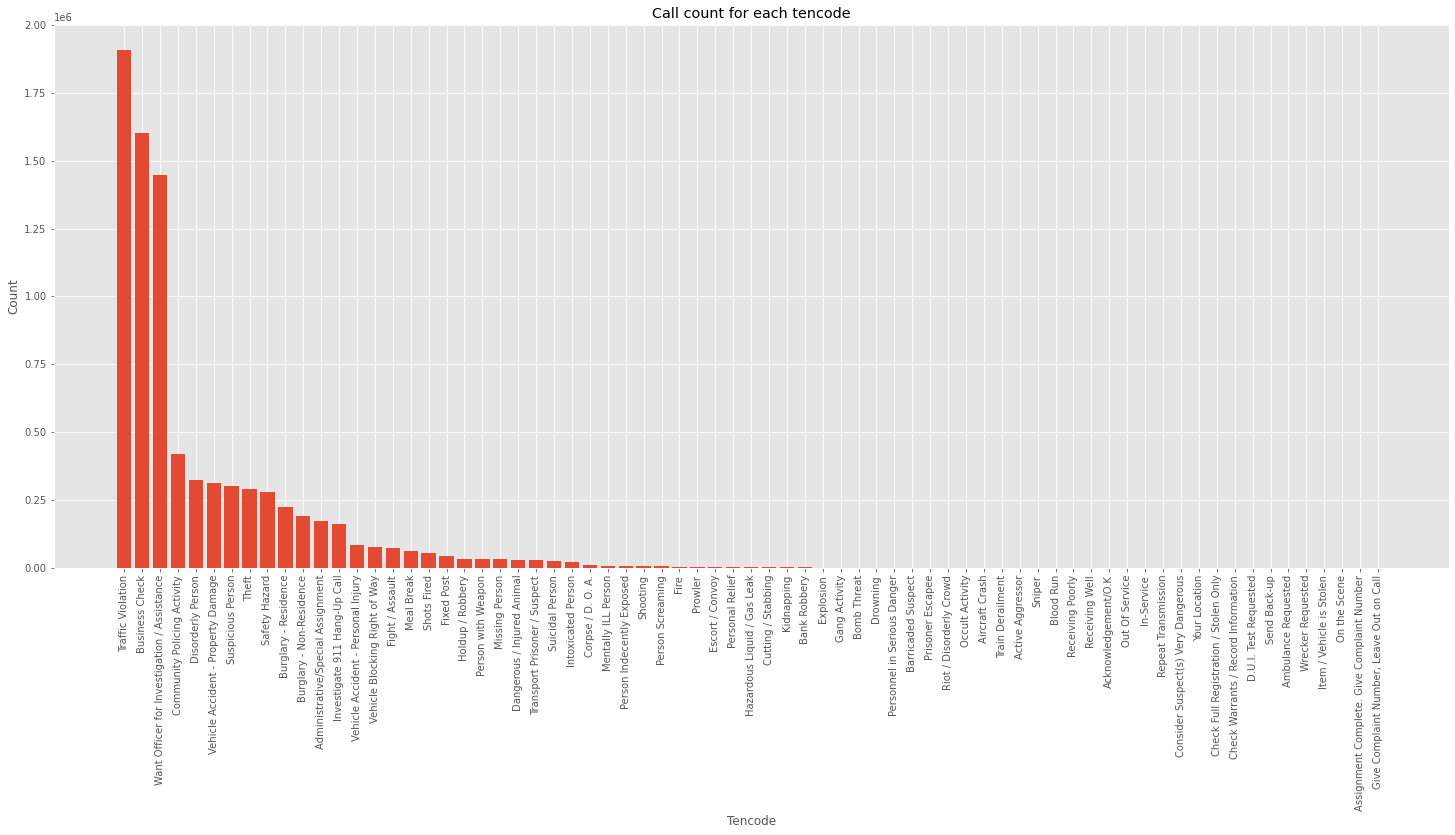

In [25]:
plt.figure(figsize=(25,10))
plt.bar(tencodeplot.keys(), tencodeplot.values())
plt.xticks(rotation=90)
plt.title('Call count for each tencode')
plt.ylabel('Count')
plt.xlabel('Tencode')
plt.show()

In [36]:
100*data.Tencode.value_counts().max()/data.Tencode.count()

23.031323093991258

From this graph we can see that the bulk of the calls are actually minor issues, top one being Traffic Violations (23%). This might have a lot to do with the decline in calls during 2020 due to people staying at home for COVID-19.

Let us pick and choose the ones that, in my opinion, are more interesting/concerning:

In [26]:
tencodes = {32 : 'D.U.I Test Requested',
 42 : 'Intoxicated Person',
 35 : 'Mentally ILL Person',
 50 : 'Theft',
 52 : 'Shooting',
 53 : 'Holdup / Robbery',
 54 : 'Person with Weapon',
 57 : 'Fight / Assault',
 64 : 'Corpse / D. O. A.',
 66 : 'Bomb Threat',
 68 : 'Kidnapping',
 70 : 'Burglary - Residence',
 75 : 'Missing Person',
 85 : 'Prisoner Escapee',
 1000 : 'Bank Robbery',
 2000 : 'Aircraft Crash',
 3000 : 'Barricaded Suspect',
 4000 : 'Sniper',
 5000 : 'Personnel in Serious Danger',
 6000 : 'Riot / Disorderly Crowd',
 7000 : 'Train Derailment',
 8000 : 'Explosion',
 9000 : 'Active Aggressor'}

In [27]:
tencodeplot = dict()
for k,v in tencodes.items():
    x = data[data.Tencode ==k].Tencode.count()
    tencodeplot[v] = x
tencodeplot = {k: v for k, v in sorted(tencodeplot.items(), key=lambda item: item[1], reverse=True)}
tencodeplot

{'Theft': 289949,
 'Burglary - Residence': 223634,
 'Fight / Assault': 73744,
 'Holdup / Robbery': 34171,
 'Person with Weapon': 32106,
 'Missing Person': 31326,
 'Intoxicated Person': 21840,
 'Corpse / D. O. A.': 9987,
 'Mentally ILL Person': 7372,
 'Shooting': 5194,
 'Kidnapping': 1314,
 'Bank Robbery': 1121,
 'Explosion': 668,
 'Bomb Threat': 506,
 'Personnel in Serious Danger': 232,
 'Barricaded Suspect': 184,
 'Prisoner Escapee': 134,
 'Riot / Disorderly Crowd': 89,
 'Aircraft Crash': 14,
 'Train Derailment': 13,
 'Active Aggressor': 11,
 'Sniper': 10,
 'D.U.I Test Requested': 0}

This is self-explanatory. I think some of this are very interesting, such as Bank Robbery, Sniper, or Aircraft Crash.

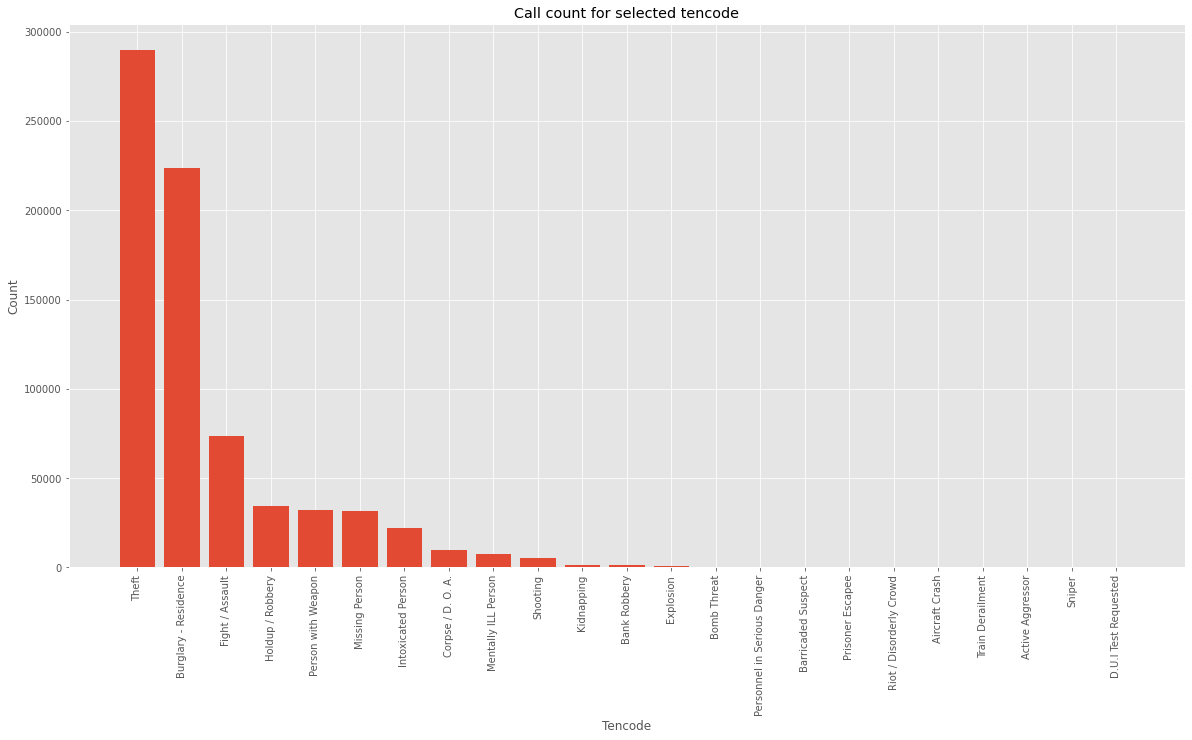

In [28]:
plt.figure(figsize=(20,10))
plt.bar(tencodeplot.keys(), tencodeplot.values())
plt.xticks(rotation=90)
plt.title('Call count for selected tencode')
plt.ylabel('Count')
plt.xlabel('Tencode')
plt.show()

In [37]:
100*data[data.Tencode==70].Tencode.count()/data.Tencode.count()

2.7003337592917025

In [38]:
100*data[data.Tencode==50].Tencode.count()/data.Tencode.count()

3.5010735092734997

- Theft and Burglary are the most common types of calls representing 3.5% and 2.7% respectively 
- There have been 9987 Dead on Arrival calls, it would be interesting to see how many of those are actual homicides

Let's look into the outcome of the Theft and Residential Burglary calls:

- 1 M.P.D. REPORT COMPLETED
- 10 NO RESPONSE
- 11 DISREGARD / SIGNAL 9
- 12 LOCATION/BUILDING SECURE
- 13 FALSE CALL
- 14 ASSISTANCE REFUSED
- 15 COMMUNITY POLICING
- 2 ARREST, CUSTODIAL OR CITATION
- 3 CITATION - TRAFFIC
- 4 ASSISTED CITIZEN
- 5 GONE ON ARRIVAL
- 6 ASSISTED OTHER UNIT
- 7 ADVISORY / NOTICE FORM GIVEN
- 8 ADVISED IN CIVIL CASE
- 9 SUBJECT WARNED
- A CLOSED BY ARREST
- C CLOSED
- O OPEN
- P PENDING

In [29]:
disposition= {
'1' :"M.P.D. REPORT COMPLETED",
'10' :"NO RESPONSE",
'11' :"DISREGARD / SIGNAL 9",
'12' :"LOCATION/BUILDING SECURE",
'13' :"FALSE CALL",
'14' :"ASSISTANCE REFUSED",
'15' :"COMMUNITY POLICING",
'2' :"ARREST, CUSTODIAL OR CITATION",
'3' :"CITATION - TRAFFIC",
'4' :"ASSISTED CITIZEN",
'5' :"GONE ON ARRIVAL",
'6' :"ASSISTED OTHER UNIT",
'7' :"ADVISORY / NOTICE FORM GIVEN",
'8' :"ADVISED IN CIVIL CASE",
'9' :"SUBJECT WARNED",
'A' :"CLOSED BY ARREST",
'C' :"CLOSED",
'O' :"OPEN",
'P' :"PENDING",
}

In [30]:
dispositionplot = {}
for k,v in disposition.items():
    x = data[data['Disposition Code'] == k]['Disposition Code'].count()
    dispositionplot[v] = x
dispositionplot = {k: v for k, v in sorted(dispositionplot.items(), key=lambda item: item[1], reverse=True)}
dispositionplot

{'LOCATION/BUILDING SECURE': 1240039,
 'ASSISTED CITIZEN': 1001538,
 'DISREGARD / SIGNAL 9': 884023,
 'COMMUNITY POLICING': 852804,
 'ASSISTED OTHER UNIT': 561800,
 'M.P.D. REPORT COMPLETED': 515561,
 'GONE ON ARRIVAL': 376237,
 'SUBJECT WARNED': 365870,
 'NO RESPONSE': 145252,
 'CITATION - TRAFFIC': 90295,
 'FALSE CALL': 66108,
 'ARREST, CUSTODIAL OR CITATION': 35410,
 'ASSISTANCE REFUSED': 19023,
 'ADVISED IN CIVIL CASE': 17756,
 'ADVISORY / NOTICE FORM GIVEN': 5320,
 'CLOSED BY ARREST': 0,
 'CLOSED': 0,
 'OPEN': 0,
 'PENDING': 0}

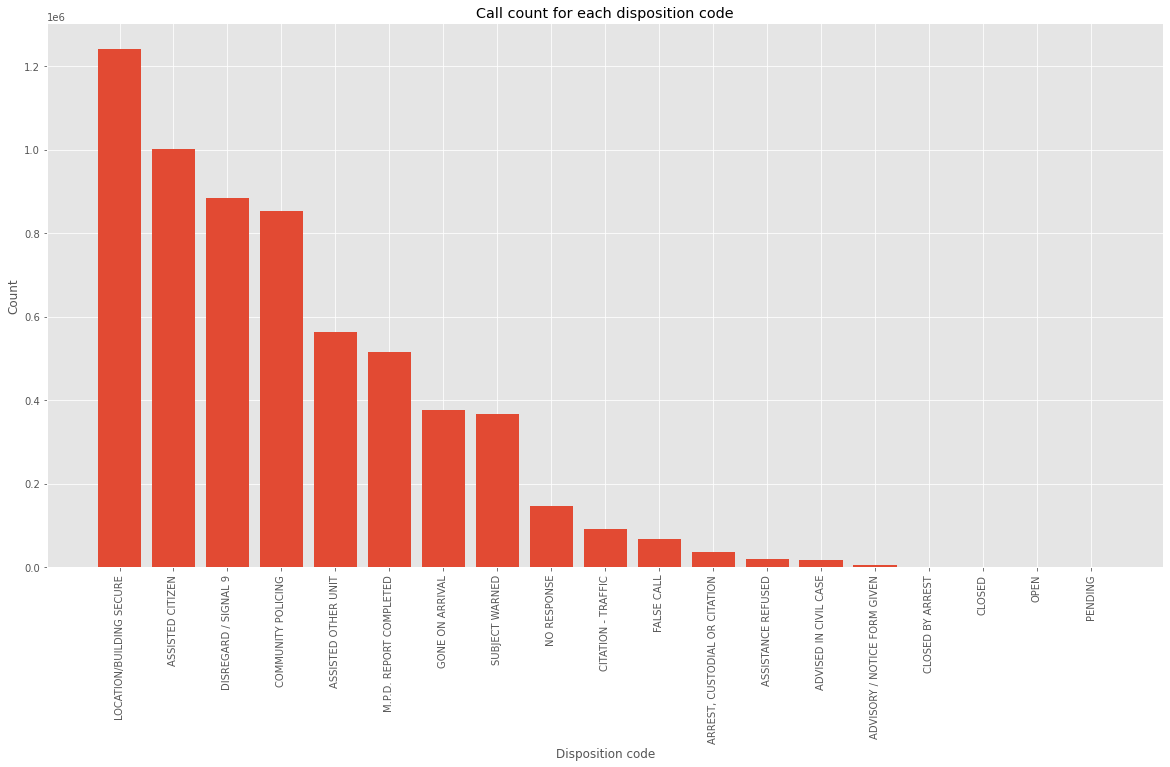

In [31]:
plt.figure(figsize=(20,10))
plt.bar(dispositionplot.keys(), dispositionplot.values())
plt.xticks(rotation=90)
plt.title('Call count for each disposition code')
plt.ylabel('Count')
plt.xlabel('Disposition code')
plt.show()

Again, this is pretty self-explanatory. Most calls end up by 'Securing Location/Building,' 'Assisted Citizen,' and 'Disregard'.

In [32]:
theft={}
for k,v in disposition.items():
    
    x = data[(data['Disposition Code'] == k)&(data.Tencode == 50)].Tencode.count()
    theft[v] = x
theft = {k: v for k, v in sorted(theft.items(), key=lambda item: item[1], reverse=True)}
theft

{'M.P.D. REPORT COMPLETED': 166295,
 'DISREGARD / SIGNAL 9': 38552,
 'ASSISTED OTHER UNIT': 19274,
 'ASSISTED CITIZEN': 18584,
 'GONE ON ARRIVAL': 11722,
 'NO RESPONSE': 4852,
 'ASSISTANCE REFUSED': 2501,
 'ADVISED IN CIVIL CASE': 1546,
 'ARREST, CUSTODIAL OR CITATION': 842,
 'CITATION - TRAFFIC': 735,
 'SUBJECT WARNED': 292,
 'FALSE CALL': 248,
 'ADVISORY / NOTICE FORM GIVEN': 245,
 'COMMUNITY POLICING': 174,
 'LOCATION/BUILDING SECURE': 119,
 'CLOSED BY ARREST': 0,
 'CLOSED': 0,
 'OPEN': 0,
 'PENDING': 0}

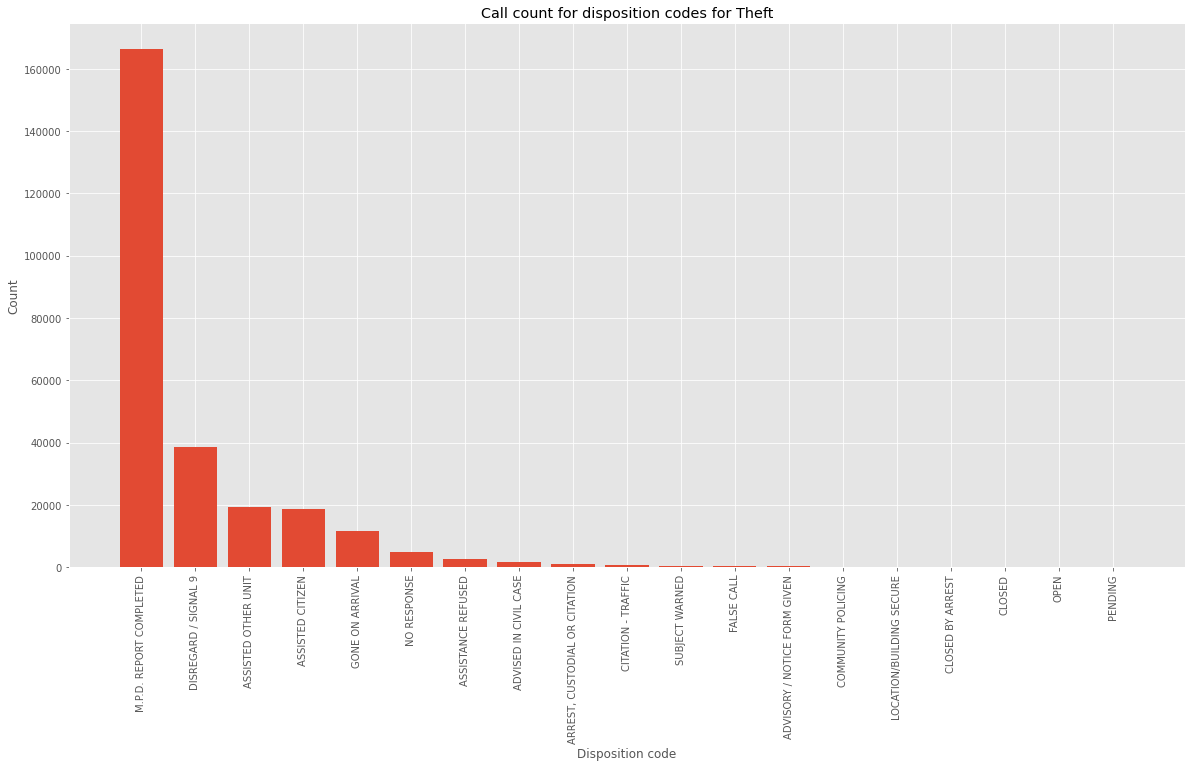

In [33]:
plt.figure(figsize=(20,10))
plt.bar(theft.keys(), theft.values())
plt.xticks(rotation=90)
plt.title('Call count for disposition codes for Theft')
plt.ylabel('Count')
plt.xlabel('Disposition code')
plt.show()

This is expected. Most theft calls are closed out with a report. We don't have insight into what kind of theft these are, but I imagine most of them are minor, and there is not much the police can do if about these. 

In [34]:
burglary={}
for k,v in disposition.items():
    x = data[(data['Disposition Code'] == k)&(data.Tencode == 70)].Tencode.count()
    burglary[v] = x
burglary = {k: v for k, v in sorted(burglary.items(), key=lambda item: item[1], reverse=True)}
burglary

{'DISREGARD / SIGNAL 9': 88207,
 'LOCATION/BUILDING SECURE': 43789,
 'FALSE CALL': 22613,
 'ASSISTED OTHER UNIT': 17246,
 'M.P.D. REPORT COMPLETED': 15146,
 'ASSISTED CITIZEN': 5828,
 'NO RESPONSE': 5680,
 'ADVISORY / NOTICE FORM GIVEN': 1252,
 'GONE ON ARRIVAL': 876,
 'ASSISTANCE REFUSED': 147,
 'COMMUNITY POLICING': 139,
 'SUBJECT WARNED': 110,
 'ADVISED IN CIVIL CASE': 53,
 'ARREST, CUSTODIAL OR CITATION': 40,
 'CITATION - TRAFFIC': 30,
 'CLOSED BY ARREST': 0,
 'CLOSED': 0,
 'OPEN': 0,
 'PENDING': 0}

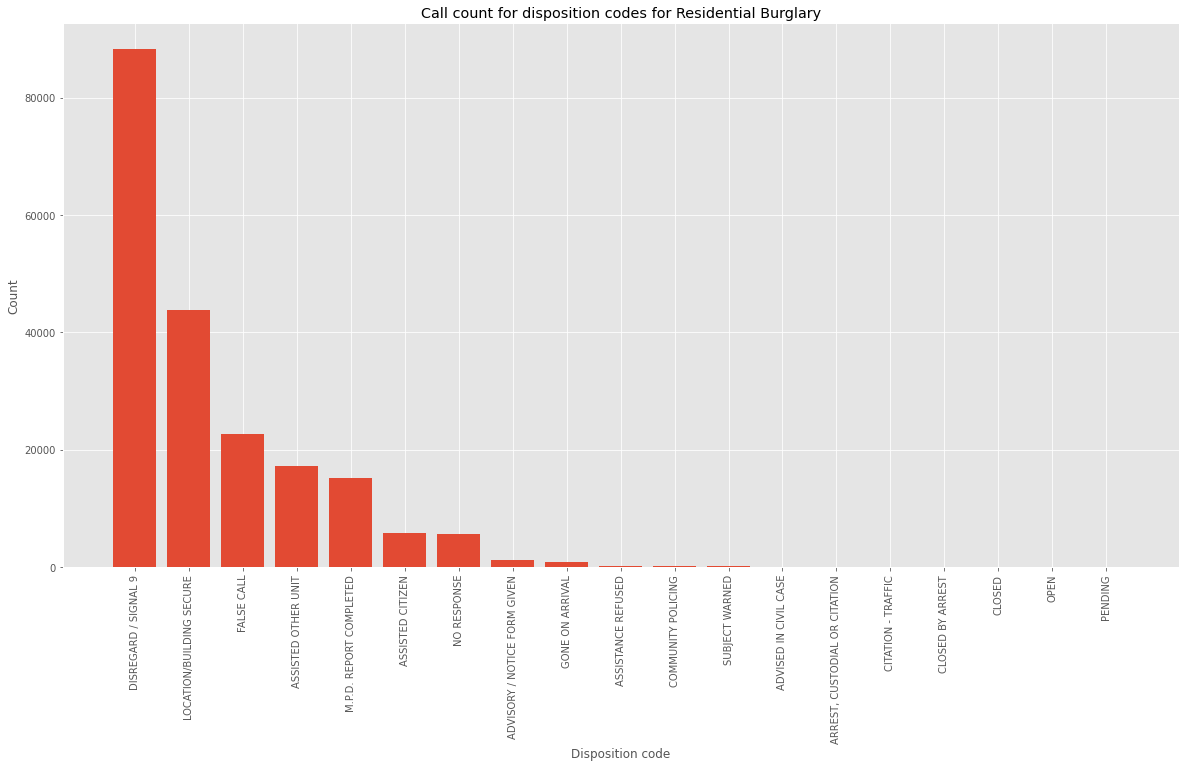

In [35]:
plt.figure(figsize=(20,10))
plt.bar(burglary.keys(), burglary.values())
plt.xticks(rotation=90)
plt.title('Call count for disposition codes for Residential Burglary')
plt.ylabel('Count')
plt.xlabel('Disposition code')
plt.show()

Interesting... Here we can see that around half the calls about residential burglary are closed out as 'Disregard', that is: Around half the residential burglary calls end up being fake or false alarms.

# Conclusions

- Most of these calls happen in the Nashville area, as expected, since other cities/counties are cover by different police departments
- The number of calls has been somewhat steady in the last ~7 years. However, we can see how its slope has decreased a little towards the last few years 
- Highest number of service calls happened on January 4th of 2013 with 4,395 calls
- Lowest number of service calls happened on December 8th of 2020 with 4 calls. This outlier is most likely due to an error in the system, however, I could not find any news articles about this specific day to make sure this is not an error
- Second lowest number of service calls happened on November 26th of 2020 with 1001 calls
- The month with the most calls overall is January. With most common tencodes being:
    - 93 Traffic Violation
    - 96 Business Check
    - 43 Want Officer for Investigation / Assistance
    And if we break it down by year:
    - From 2013 to 2018 we have the same ones:
        - 93 Traffic Violation
        - 96 Business Check
        - 43 Want Officer for Investigation / Assistance

    - For 2019 we have:
        - 96 Business Check
        - 43 Want Officer for Investigation / Assistance
        - 15 Community Policing Activity

    - And for 2020:
        - 96 Business Check
        - 43 Want Officer for Investigation / Assistance
        - 44 Disorderly Person

    - So far, for 2021 we have:
        - 96 Business Check
        - 43 Want Officer for Investigation / Assistance
        - 44 Disorderly Person
- Sundays is the day with the least calls, followed by Saturday. The rest are pretty equally distributed. This might be because there are not as many people driving during Saturday and Sunday as there is during the week
- We do not have enough data to make any claims about the sectors
- The bulk of the calls are actually minor issues. Traffic violations being the top one
- We selected the tencodes we felt were the most important/interesting and got:
    - Theft and Burglary are the most common types of calls
    - There have been 9987 Dead on Arrival calls, it would be interesting to see how many of those are actual homicides
    And, in looking deeper into the most common types of calls, we could see:
        - Around half the calls about residential burglary are closed out as 'Disregard' 
        - Most theft calls are closed out with a report
- Most calls end up by 'Securing Location/Building,' 'Assisted Citizen,' and 'Disregard'